In [1]:
import pandas as pd
occupancy = pd.read_csv('~/Downloads/occupancy.csv')
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [2]:
Tc = 3600 # seconds in 1 hour
f = 1/Tc
f # Hertz

0.0002777777777777778

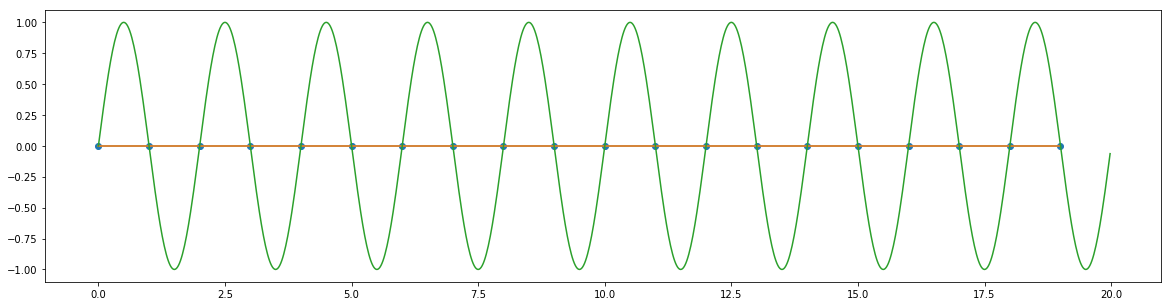

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

FM =20 # 50 Hz
x = np.arange(0,FM)

plt.figure(figsize=(20,5))
FS = 10
y1 = np.sin(x/FM*2*math.pi*FS) 
plt.plot(x,y1)
plt.scatter(x,y1)

plt.plot(x,np.zeros(FM))

FM2 = 1000 # 50 Hz
x = np.arange(0,FM2)
y2 = np.sin(x/FM2*2*math.pi*FS) 
plt.plot(x/(FM2/FM),y2)


0    749.200000
1    760.400000
2    769.666667
3    774.750000
4    779.000000
Name: CO2, dtype: float64

(2664,)


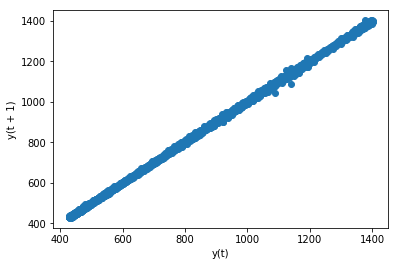

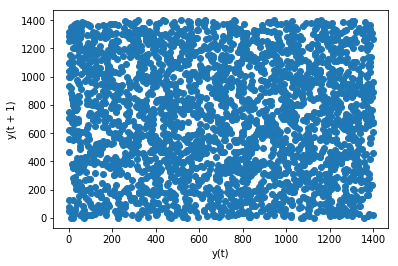

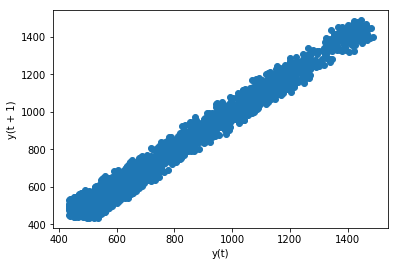

In [28]:
from pandas.plotting import lag_plot
display(occupancy.CO2.head())
print(occupancy.CO2.shape)
rn = pd.Series(np.random.random(2664)*1400)
plt.figure()
lag_plot(occupancy.CO2)
plt.figure()
lag_plot(rn)
plt.figure()
lag_plot(occupancy.CO2 + np.random.random(2664)*100 )


In [29]:
from statsmodels.tsa.ar_model import AR

train, test = occupancy.CO2[:-10], occupancy.CO2[-10:]
model = AR(occupancy.CO2)
model_fit = model.fit(maxlag=1)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [35]:
print("Error on autoregresion {}".format((predictions-test).sum()))

Error on autoregresion 30.73311074741264


In [47]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(occupancy.CO2, order=(4, 2))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(len(occupancy.CO2)-10, len(occupancy.CO2)-1)
predictions

2654    1152.552232
2655    1153.211815
2656    1152.468405
2657    1145.603493
2658    1145.892708
2659    1140.036551
2660    1151.607073
2661    1125.035305
2662    1126.556617
2663    1121.784851
dtype: float64

In [49]:
print("Error on ARMA {}".format((predictions-test).sum()))

Error on ARMA 24.482383343426136
